In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import time
%matplotlib inline

# Insert mavenn at beginning of path
import sys
path_to_mavenn_local = '../../../../'
sys.path.insert(0,path_to_mavenn_local)

#Load mavenn and check path
import mavenn
print(mavenn.__path__)

# MAVE-NN utilities
from mavenn.src.dev import mutations_to_dataset

['../../../../mavenn']


In [2]:
# Save data_df
file_name = '../ace2rbd_data.csv.gz'
data_df = pd.read_csv(file_name, compression='gzip')

In [3]:
# Split into training and test sets
ix = data_df['training_set']
training_df = data_df[ix].copy()
test_df = data_df[~ix].copy()

In [4]:
# Set seeed
mavenn.set_seed(0)

# Define additive model
model = mavenn.Model(x=training_df['x'].values,
                     y=training_df['y'].values,
                     alphabet='protein',
                     gpmap_type='additive',
                     regression_type='GE',
                     ge_noise_model_type='SkewedT',
                     ge_heteroskedasticity_order=2)

# Fit additive model
history = model.fit(epochs=1000, 
                    early_stopping=True, 
                    early_stopping_patience=20,
                    learning_rate=.0005)

 
LSMR            Least-squares solution of  Ax = b

The matrix A has   117078 rows  and     4020 cols
damp = 0.00000000000000e+00

atol = 1.00e-06                 conlim = 1.00e+08

btol = 1.00e-06             maxiter =     4020

 
   itn      x(1)       norm r    norm Ar  compatible   LS      norm A   cond A
     0  0.00000e+00  3.422e+02  1.153e+04   1.0e+00  9.9e-02
     1  1.33347e-07  3.422e+02  8.360e+03   1.0e+00  7.4e-03  3.3e+03  1.0e+00
     2  1.27040e-03  2.842e+02  3.535e+03   8.3e-01  2.6e-03  4.8e+03  1.1e+02
     3 -2.82243e-04  2.670e+02  2.271e+03   7.8e-01  1.8e-03  4.8e+03  1.4e+02
     4 -3.94441e-03  2.571e+02  1.874e+03   7.5e-01  1.5e-03  4.8e+03  1.9e+02
     5 -3.95314e-03  2.571e+02  1.874e+03   7.5e-01  1.5e-03  4.8e+03  2.2e+02
     6 -1.07289e-02  2.452e+02  1.577e+03   7.2e-01  9.5e-04  6.8e+03  1.0e+02
     7 -1.98926e-02  2.325e+02  1.349e+03   6.8e-01  8.6e-04  6.8e+03  2.6e+02
     8 -3.20779e-02  2.182e+02  1.126e+03   6.4e-01  7.6e-04  6.8e+03  2.6

1874/1874 [==============================] - 4s 2ms/step - loss: -14.6102 - val_loss: -2.7360
Epoch 57/1000
1874/1874 [==============================] - 4s 2ms/step - loss: -14.5402 - val_loss: -3.7487
Epoch 58/1000
1874/1874 [==============================] - 5s 2ms/step - loss: -14.5532 - val_loss: -0.91668
Epoch 59/1000
1874/1874 [==============================] - 5s 2ms/step - loss: -14.8045 - val_loss: -3.3494
Epoch 60/1000
1874/1874 [==============================] - 4s 2ms/step - loss: -15.2231 - val_loss: -4.0935
Epoch 61/1000
1874/1874 [==============================] - 5s 2ms/step - loss: -14.9844 - val_loss: 0.5745
Epoch 62/1000
1874/1874 [==============================] - 5s 2ms/step - loss: -14.6248 - val_loss: -3.5795
Epoch 63/1000
1874/1874 [==============================] - 4s 2ms/step - loss: -15.3476 - val_loss: -1.3488
Epoch 64/1000
1874/1874 [==============================] - 5s 2ms/step - loss: -15.6498 - val_loss: -1.3745
Epoch 65/1000
1874/1874 [=================

Epoch 132/1000
1874/1874 [==============================] - 6s 3ms/step - loss: -20.3531 - val_loss: -8.7738
Epoch 133/1000
1874/1874 [==============================] - 5s 3ms/step - loss: -20.1515 - val_loss: -5.3535
Epoch 134/1000
1874/1874 [==============================] - 4s 2ms/step - loss: -19.8327 - val_loss: -8.4947
Epoch 135/1000
1874/1874 [==============================] - 5s 2ms/step - loss: -19.9825 - val_loss: -4.7922
Epoch 136/1000
1874/1874 [==============================] - 4s 2ms/step - loss: -20.5341 - val_loss: -8.1738
Epoch 137/1000
1874/1874 [==============================] - 5s 3ms/step - loss: -20.5101 - val_loss: -8.2366
Epoch 138/1000
1874/1874 [==============================] - 5s 3ms/step - loss: -20.4844 - val_loss: -8.8974
Epoch 139/1000
1874/1874 [==============================] - 5s 2ms/step - loss: -20.2928 - val_loss: -8.1114
Epoch 140/1000
1874/1874 [==============================] - 5s 2ms/step - loss: -20.2298 - val_loss: -8.7922
Epoch 141/1000
1874

1874/1874 [==============================] - 5s 2ms/step - loss: -21.3987 - val_loss: -9.0813
Epoch 208/1000
1874/1874 [==============================] - 5s 2ms/step - loss: -21.5681 - val_loss: 3.6182
Epoch 209/1000
1874/1874 [==============================] - 5s 2ms/step - loss: -21.6000 - val_loss: -8.3983
Epoch 210/1000
1874/1874 [==============================] - 5s 2ms/step - loss: -21.3157 - val_loss: -8.1831
Epoch 211/1000
1874/1874 [==============================] - 5s 2ms/step - loss: -21.4892 - val_loss: 1.4056
Epoch 212/1000
1874/1874 [==============================] - 5s 2ms/step - loss: -21.2714 - val_loss: -7.2934
Epoch 213/1000
1874/1874 [==============================] - 5s 2ms/step - loss: -21.6839 - val_loss: -5.5879
Epoch 214/1000
1874/1874 [==============================] - 5s 2ms/step - loss: -21.2281 - val_loss: -8.9649
training time: 1072.9 seconds


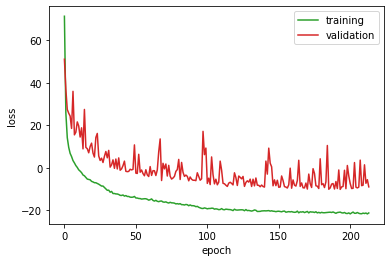

In [5]:
# Extract training loss and validation loss
history_dict = history.history
loss_training = history_dict['loss']
loss_validation = history_dict['val_loss']

# Plot model training history
fig, ax = plt.subplots()
ax.plot(loss_training, color='C2', label='training')
ax.plot(loss_validation, color='C3', label='validation')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend()

In [6]:
# Determine wild-type sequence
wt_seq = mavenn.x_to_consensus(training_df['x'])
wt_seq

'NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST'

In [7]:
# Get mask, if any. Will show which amino acids were not assayed
mask_dict = mavenn.get_mask_dict(training_df['x'], alphabet='protein')
mask_dict

{19: 'F', 66: 'EKMQW', 192: 'CEHKMQW', 193: 'CEFHKMNQS'}

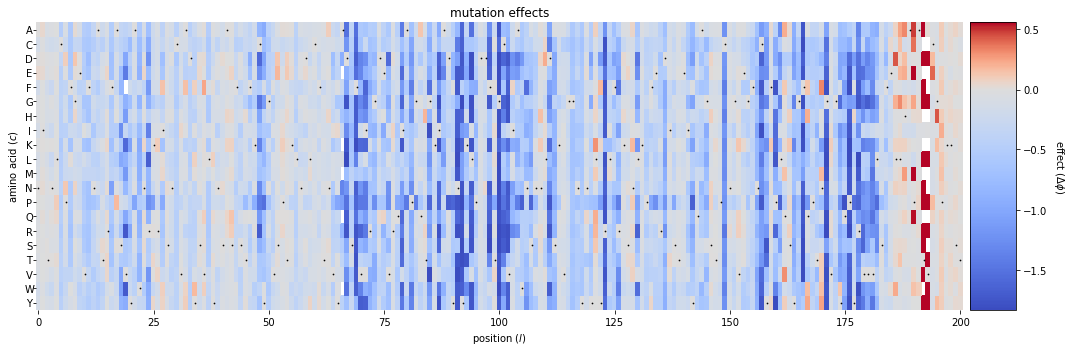

In [8]:
# Get effects of all single-point mutations on phi
dphi_df = mavenn.get_1pt_effects(func=model.x_to_phi,
                                 wt_seq=wt_seq,
                                 alphabet='protein')
# Draw heatmap
fig, ax = plt.subplots(figsize=[15,5])
ax, cb = mavenn.heatmap(dphi_df,
                        ccenter=0,
                        clim_quantile=.99,
                        mask_dict=mask_dict,
                        missing_values=0,
                        c_col='c_mut',
                        l_col='l',
                        value_col='dphi',
                        seq=wt_seq,
                        ax=ax)
ax.set_xlabel('position ($l$)')
ax.set_ylabel('amino acid ($c$)')
cb.set_label('effect ($\Delta\phi$)', rotation=-90, va="bottom")
ax.set_title('mutation effects')
fig.tight_layout()
fig.savefig('ace2rbd.pdf')

In [9]:
N = len(test_df['x'].values)
ix = np.random.rand(N) < .5

# Extract data into np.arrays
x = test_df['x'].values[ix]
y = test_df['y'].values[ix]

# Compute phi and yhat values
phi = model.x_to_phi(x)
yhat = model.phi_to_yhat(phi)

# Create grid for plotting yhat and yqs
phi_lim = [-5, 2.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)
yhat_grid = model.phi_to_yhat(phi_grid)
yqs_grid = model.yhat_to_yq(yhat_grid, q=[.05,.95])

Text(0.5, 1.0, 'measurement process')

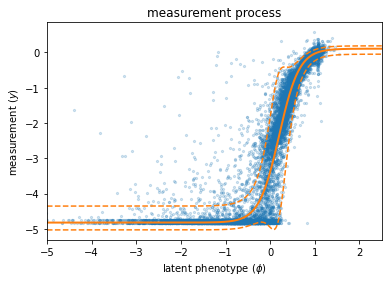

In [10]:
fig, ax = plt.subplots()

ax.scatter(phi, y, color='C0', s=5, alpha=.2, label='test data')
ax.plot(phi_grid, yhat_grid, linewidth=2, color='C1',
        label='$\hat{y} = g(\phi)$')
ax.plot(phi_grid, yqs_grid[:, 0], linestyle='--', color='C1',
        label='68% CI')
ax.plot(phi_grid, yqs_grid[:, 1], linestyle='--', color='C1')
ax.set_xlim(phi_lim)
#ax.set_ylim([-10, 10])
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_ylabel('measurement ($y$)')
ax.set_title('measurement process')

In [11]:
# Save model
model.save('ace2rbd_model')

Model saved to these files:
	ace2rbd_model.pickle
	ace2rbd_model.h5
